[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



 Evaluation Metrics on Validation Set:
Accuracy : 0.9732
Precision: 0.9735
Recall   : 0.9732
F1-Score : 0.9730

 Classification Report:

               precision    recall  f1-score   support

     business       0.94      0.99      0.96        67
entertainment       0.98      1.00      0.99        55
     politics       0.98      0.93      0.95        55
        sport       1.00      1.00      1.00        69
         tech       0.96      0.94      0.95        52

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



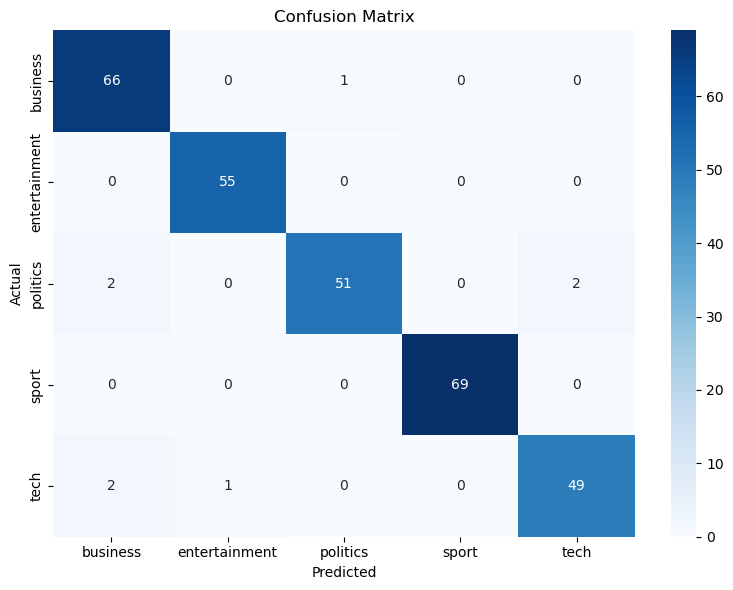

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

train_df = pd.read_csv("BBC News Train.csv")
test_df = pd.read_csv("BBC News Test.csv")

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text) 
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = re.sub(r'\s+', ' ', text)  
    return text.strip()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    return " ".join(tokens)

train_df["clean_text"] = train_df["Text"].apply(preprocess)
test_df["clean_text"] = test_df["Text"].apply(preprocess)

X = train_df["clean_text"]
y = train_df["Category"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(test_df["clean_text"])

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_val_pred = model.predict(X_val_vec)

print("\n Evaluation Metrics on Validation Set:")
print(f"Accuracy : {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_val, y_val_pred, average='weighted'):.4f}")
print(f"F1-Score : {f1_score(y_val, y_val_pred, average='weighted'):.4f}")

print("\n Classification Report:\n")
print(classification_report(y_val, y_val_pred))

cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

test_df["Category"] = model.predict(X_test_vec)

predictions = test_df[["ArticleId", "Category"]]
predictions.to_csv("bbc_news_predictions.csv", index=False)


### Predictions


In [56]:
predictions

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport
...,...,...
730,1923,business
731,373,entertainment
732,1704,politics
733,206,business


In [9]:
print([i for i in test_df[test_df['ArticleId']==1319]['Text']]) 

['software watching while you work software that can not only monitor every keystroke and action performed at a pc but also be used as legally binding evidence of wrong-doing has been unveiled.  worries about cyber-crime and sabotage have prompted many employers to consider monitoring employees. the developers behind the system claim it is a break-through in the way data is monitored and stored. but privacy advocates are concerned by the invasive nature of such software.  the system is a joint venture between security firm 3ami and storage specialists bridgehead software. they have joined forces to create a system which can monitor computer activity  store it and retrieve disputed files within minutes. more and more firms are finding themselves in deep water as a result of data misuse. sabotage and data theft are most commonly committed from within an organisation according to the national hi-tech crime unit (nhtcu) a survey conducted on its behalf by nop found evidence that more than 